# Проект: Исследование стартапов


Содержание:  
- Шаг 1. Знакомство с данными: загрузка и первичная предобработка  
- Шаг 2. Предобработка данных, предварительное исследование  
- Шаг 3. Исследовательский анализ объединенных таблиц




## Шаг 1. Знакомство с данными: загрузка и первичная предобработка


### 1.1. Вывод общей информации, исправление названия столбцов


In [1]:
# Импотируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Загружаем данные в переменную acquisition
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

In [4]:
# Выводим первые строки и информацию о датафрейме
display(acquisition.head())
acquisition.info()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 9407 entries, 0 to 9406
,Data columns (total 6 columns):
, #   Column                Non-Null Count  Dtype 
,---  ------                --------------  ----- 
, 0   id                    9407 non-null   int64 
, 1   acquiring_company_id  9407 non-null   int64 
, 2   acquired_company_id   9407 non-null   int64 
, 3   term_code             1831 non-null   object
, 4   price_amount          9407 non-null   int64 
, 5   acquired_at           9378 non-null   object
,dtypes: int64(4), object(2)
,memory usage: 441.1+ KB


В датафрейме acquisition всего 9407 строк и 6 столбцов. Довольно большое количество пропусков содержится в столбце term_code. Пропуски присутствуют также и в acquired_at, но их количество не такое значительное

In [5]:
# Загружаем данные в переменную company_and_rounds
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

In [6]:
# Выводим первые строки и информацию о датафрейме
display(company_and_rounds.head())
company_and_rounds.info()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,888.00,1.00,2005-10-01,series-a,5250000.00,0.00,2.00,0.00,1.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,889.00,1.00,2007-01-01,series-b,9500000.00,0.00,3.00,0.00,0.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,2312.00,1.00,2008-05-19,series-c+,25000000.00,0.00,4.00,1.00,0.00
3,10.00,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 217774 entries, 0 to 217773
,Data columns (total 22 columns):
, #   Column                 Non-Null Count   Dtype  
,---  ------                 --------------   -----  
, 0   company  ID            217472 non-null  float64
, 1   name                   217472 non-null  object 
, 2   category  code         143886 non-null  object 
, 3   status                 217472 non-null  object 
, 4   founded  at            109956 non-null  object 
, 5   closed  at             3449 non-null    object 
, 6   domain                 147159 non-null  object 
, 7   network  username      95534 non-null   object 
, 8   country  code          108607 non-null  object 
, 9   investment  rounds     217472 non-null  float64
, 10  funding  rounds        217472 non-null  float64
, 11  funding  total         217472 non-null  float64
, 12  milestones             217472 non-null  float64
, 13  funding  round  id     52928 non-null   float64
, 14  company  id      

В датафрейме company_and_rounds 217774 строки и 22 столбца. В данном случае огромное количество пропусков присутствует почти во всех столбцах, кроме company  ID, name, status, investment  rounds, funding  rounds,  funding  total, milestones. Также стоит обратить внимание, что в данных встречается два столбца, содержающих информацию об id компании - company ID и company id

In [7]:
# Приводим названия столбцов к типу snake case
company_and_rounds.columns = company_and_rounds.columns.str.replace('  ','_')
company_and_rounds = company_and_rounds.rename(columns={'company_ID': 'company_id_cr'})
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 217774 entries, 0 to 217773
,Data columns (total 22 columns):
, #   Column               Non-Null Count   Dtype  
,---  ------               --------------   -----  
, 0   company_id_cr        217472 non-null  float64
, 1   name                 217472 non-null  object 
, 2   category_code        143886 non-null  object 
, 3   status               217472 non-null  object 
, 4   founded_at           109956 non-null  object 
, 5   closed_at            3449 non-null    object 
, 6   domain               147159 non-null  object 
, 7   network_username     95534 non-null   object 
, 8   country_code         108607 non-null  object 
, 9   investment_rounds    217472 non-null  float64
, 10  funding_rounds       217472 non-null  float64
, 11  funding_total        217472 non-null  float64
, 12  milestones           217472 non-null  float64
, 13  funding_round_id     52928 non-null   float64
, 14  company_id           52928 non-null   float64
, 1

In [8]:
# Загружаем данные в переменную people
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

In [9]:
# Выводим первые строки и информацию о датафрейме
display(people.head())
people.info()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.00,NaN
1,100,Peter,Lester,27.00,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN
3,10000,Neil,Capel,2526.00,NaN
4,100000,Sue,Pilsch,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 226709 entries, 0 to 226708
,Data columns (total 5 columns):
, #   Column            Non-Null Count   Dtype  
,---  ------            --------------   -----  
, 0   id                226709 non-null  int64  
, 1   first_name        226704 non-null  object 
, 2   last_name         226708 non-null  object 
, 3   company_id        34615 non-null   float64
, 4   network_username  38867 non-null   object 
,dtypes: float64(1), int64(1), object(3)
,memory usage: 8.6+ MB


В датафрейме people 226709 строк и 5 столбцов. Наибольшее количество пропусков содержат столбцы company_id и network_username

In [10]:
# Загружаем данные в переменную education
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

In [11]:
# Выводим первые строки и информацию о датафрейме
display(education.head())
education.info()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 109610 entries, 0 to 109609
,Data columns (total 4 columns):
, #   Column        Non-Null Count   Dtype 
,---  ------        --------------   ----- 
, 0   id            109610 non-null  int64 
, 1   person_id     109610 non-null  int64 
, 2   instituition  109555 non-null  object
, 3   graduated_at  58054 non-null   object
,dtypes: int64(2), object(2)
,memory usage: 3.3+ MB


В датафрейме education 109610 строк и 4 столбца. Наибольшее количество пропусков содержит столбец graduated_at

In [12]:
# Загружаем данные в переменную degrees
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [13]:
# Выводим первые строки и информацию о датафрейме
display(degrees.head())
degrees.info()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 109610 entries, 0 to 109609
,Data columns (total 4 columns):
, #   Column       Non-Null Count   Dtype 
,---  ------       --------------   ----- 
, 0   id           109610 non-null  int64 
, 1   object_id    109610 non-null  object
, 2   degree_type  98392 non-null   object
, 3   subject      81298 non-null   object
,dtypes: int64(1), object(3)
,memory usage: 3.3+ MB


В датафрейме degrees 109610 строк и 4 столбца. Наибольшее количество пропусков содержат столбцы degree_type и subject

In [14]:
# Загружаем данные в переменную fund
fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

In [15]:
# Выводим первые строки и информацию о датафрейме
display(fund.head())
fund.info()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 11652 entries, 0 to 11651
,Data columns (total 9 columns):
, #   Column              Non-Null Count  Dtype 
,---  ------              --------------  ----- 
, 0   id                  11652 non-null  int64 
, 1   name                11650 non-null  object
, 2   founded_at          4605 non-null   object
, 3   domain              7362 non-null   object
, 4   network_username    2149 non-null   object
, 5   country_code        7053 non-null   object
, 6   investment_rounds   11652 non-null  int64 
, 7   invested_companies  11652 non-null  int64 
, 8   milestones          11652 non-null  int64 
,dtypes: int64(4), object(5)
,memory usage: 819.4+ KB


В датафрейме fund 11652 строки и 9 столбцов. Наибольшее количество пропусков содержат столбцы founded_at, domain, network_username, country_code

In [16]:
# Загружаем данные в переменную investment
investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [17]:
# Выводим первые строки и информацию о датафрейме
display(investment.head())
investment.info()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 61403 entries, 0 to 61402
,Data columns (total 4 columns):
, #   Column            Non-Null Count  Dtype
,---  ------            --------------  -----
, 0   id                61403 non-null  int64
, 1   funding_round_id  61403 non-null  int64
, 2   company_id        61403 non-null  int64
, 3   fund_id           61403 non-null  int64
,dtypes: int64(4)
,memory usage: 1.9 MB


В датафрейме investment 61403 строки и 4 столбца. Пропусков в данных нет

### 1.2. Смена типов и анализ пропусков


In [18]:
# Меняем тип данных в столбцах, содержащих информацию о дате
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'])
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'])
education['graduated_at'] = pd.to_datetime(education['graduated_at'])
fund['founded_at'] = pd.to_datetime(fund['founded_at'])

Были выгружены данные, также осуществлена проверка названий столбцов: в датафрейме company_and_rounds названия были приведены к стилю snake case. Далее были изменены типы данных в столбцах, содержащих информацию о дате. Стоит упомянуть и довольно большое количество пропусков почти в каждом датафрейме, что может негативно повлиять на дальнейший анализ


## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам


In [19]:
# Выделяем год из даты, делаем сводную таблицу по году, количеству раундов и сумме финансирования
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year
table = pd.pivot_table(company_and_rounds, index='year', values=['raised_amount', 'funding_rounds'], aggfunc={'raised_amount': 'median', 'funding_rounds': 'count'})
display(table)

,funding_rounds,raised_amount
year,,
1960.00,9,0.00
1973.00,1,0.00
1974.00,2,0.00
1984.00,3,41000.00
1985.00,1,0.00
1987.00,2,1250000.00
1989.00,1,15000.00
1990.00,1,1000000.00
1992.00,1,2000000.00


In [20]:
# Оставляем только те строки, где количество раундов больше 50
table_more_50 = table[table['funding_rounds']>50]
display(table_more_50)

,funding_rounds,raised_amount
year,,
1999.00,76,2000000.00
2000.00,125,4200000.00
2001.00,95,3000000.00
2002.00,115,4200000.00
2003.00,154,3000000.00
2004.00,286,5000000.00
2005.00,1624,5500000.00
2006.00,2409,5000000.00
2007.00,3220,3973320.00


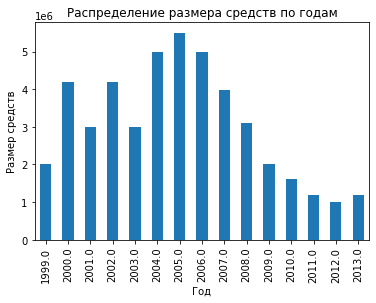

In [21]:
table_more_50['raised_amount'].plot(kind='bar', title='Распределение размера средств по годам', xlabel='Год', ylabel='Размер средств', )
plt.show()

В 2005 году типичный размер собранных в рамках одного раунда средств был максимален и составил 5 500 000. В 2013 году было зафиксировано наибольшее количество раундов (11042), при этом типичный размер средств один из самых низких по сравнению с другими годами (1 200 000)


### 2.2. Люди и их образование


In [22]:
# Объединяем два датафрейма: people и education, меняем столбцы с одинаковыми названиями
people_and_education = people.merge(education, left_on='id', right_on='person_id', how='inner')
people_and_education = people_and_education.rename(columns={'id_x': 'id_employee', 'id_y': 'id_education'})
display(people_and_education)

,id_employee,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.00,NaN,2415,10,Harvard University,NaT
1,100006,Courtney,Homer,81558.00,jobsbostontech,83604,100006,MIT Sloan School of Management,2004-01-01
2,100013,Umesh,Singh,NaN,NaN,36786,100013,Rutgers University,NaT
3,100013,Umesh,Singh,NaN,NaN,36787,100013,University of Mumbai,NaT
4,100018,Adam,Beckerman,148554.00,adam_beckerman,14433,100018,"Columbia University, Business School",2004-01-01
...,...,...,...,...,...,...,...,...,...
109051,99997,Peter,Lalonde,83651.00,peterlalonde,69682,99997,University of Ottawa,1993-01-01
109052,99997,Peter,Lalonde,83651.00,peterlalonde,69683,99997,Concordia University,1991-01-01
109053,99997,Peter,Lalonde,83651.00,peterlalonde,69684,99997,John Abbott College,1989-01-01
109054,174088,Dr. Ray,Woods,188200.00,network,25958,174088,Sydney University Medical School,1982-01-01


In [23]:
# Ищем количество и долю сотрудников, у которых есть информация об образовании (в столбце instituition или graduated_at)
people_and_education['int_and_grad'] = people_and_education['instituition'].isna() | people_and_education['graduated_at'].isna()
mean_p_e = people_and_education['int_and_grad'].mean()
print(people_and_education['int_and_grad'].sum())
print(mean_p_e)

51400
,0.4713174882629108


In [24]:
# Делаем сводную таблицу по количеству сотрудников в компаниях
groupby_pe = people_and_education.groupby('company_id')['id_employee'].count().reset_index()
groupby_pe = groupby_pe.sort_values(by='id_employee', ascending=False)
display(groupby_pe)

,company_id,id_employee
36,59.00,300
20,29.00,181
532,1242.00,155
12099,231067.00,97
1185,4175.00,82
...,...,...
8208,137440.00,1
8206,137219.00,1
3486,28216.00,1
8204,137182.00,1


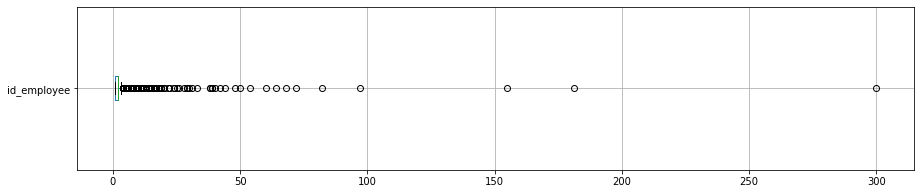

In [25]:
# Строим диаграмму размаха по количеству сотрудников в компаниях
groupby_pe.boxplot(column='id_employee', vert=False, figsize=(15, 3))
plt.show()

В данных обнаружилось много компаний с одним сотрдуников, можно предположить, что это индивидуальные предприниматели. Я решила выделить их в отдельную категорию "ИП". Другие три категории будут содержать информацию о том, маленькая, средняя или большая это компания. Границы групп были выбраны от 1 до 10, от 10 до 50, от 50 до 300.

In [26]:
# Делим компании на категории по количеству сотрудников
groupby_pe['category'] = pd.cut(groupby_pe['id_employee'], bins=[0, 1, 10, 50, 300], labels=['ИП', 'Маленькая', 'Средняя', 'Большая'])
display(groupby_pe)

,company_id,id_employee,category
36,59.00,300,Большая
20,29.00,181,Большая
532,1242.00,155,Большая
12099,231067.00,97,Большая
1185,4175.00,82,Большая
...,...,...,...
8208,137440.00,1,ИП
8206,137219.00,1,ИП
3486,28216.00,1,ИП
8204,137182.00,1,ИП


In [27]:
# Вычисляем долю сотрудников, имеющих информацию об образовании в каждой категории компаний
groupby_pe['share'] =  people_and_education.groupby('company_id')['int_and_grad'].mean()
display(groupby_pe)

,company_id,id_employee,category,share
36,59.00,300,Большая,0.00
20,29.00,181,Большая,0.54
532,1242.00,155,Большая,NaN
12099,231067.00,97,Большая,1.00
1185,4175.00,82,Большая,NaN
...,...,...,...,...
8208,137440.00,1,ИП,NaN
8206,137219.00,1,ИП,NaN
3486,28216.00,1,ИП,1.00
8204,137182.00,1,ИП,NaN


In [28]:
# Сортируем значения по доле сотрудников, имеющих информацию об образовании
sort_groupby_pe = groupby_pe.sort_values(by='share', ascending=False)
display(sort_groupby_pe)

,company_id,id_employee,category,share
3486,28216.00,1,ИП,1.00
3133,23283.00,3,Маленькая,1.00
12806,262587.00,1,ИП,1.00
557,1319.00,1,ИП,1.00
8900,151922.00,3,Маленькая,1.00
...,...,...,...,...
8209,137445.00,1,ИП,NaN
8208,137440.00,1,ИП,NaN
8206,137219.00,1,ИП,NaN
8204,137182.00,1,ИП,NaN


Таблица degrees может быть использована для выполнения задачи, но можно обойтись и без нее, тем более стоит учесть, что в ней содержатся пропуски в нужных нам столбцах

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [29]:
# Найдем количество строк в датафрейме company_and_rounds
print(len(company_and_rounds))

217774


In [30]:
# Найдем количество строк в датафрейме people
print(len(people))

226709


In [31]:
# Найдем количество совпадающих строк в столбцах network_username в датафреймах company_and_rounds и people
len(set(company_and_rounds['network_username']).intersection(set(people['network_username'])))

2200

В датафрейме company_and_rounds всего 217.774 строки, в датафрейме people - 226.709. Благодаря методу intersection() удалось установить количество совпадающих в обоих датафреймах строк, их количество составило 2200. Таким образом, столбцы network_username лучше не использовать для объединения данных


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Можно заметить, что в датафрейме содержится два столбца, содержащих информацию об id компании (company_ID и company_id). В целом, в датафрейме представлена информация о компаниях и о раундах, и в одной части присутствует больше информации о данных про компанию, а в другой - про раунды. Есть вероятность, что это были две отдельные таблицы, которые "склеили", поэтому разделим их

In [32]:
# Создаем отдельный датафрйем company с информацией о компаниях
company = company_and_rounds[['company_id_cr', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 
                             'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones']]
display(company.head())


,company_id_cr,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
3,10.00,Flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
4,100.00,There,games_video,acquired,NaT,NaN,there.com,NaN,USA,0.00,0.00,0.00,4.00


In [33]:
# Создаем отдельный датафрйем rounds с информацией о раундах финансирования
rounds = company_and_rounds[['company_id_cr', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round', 'year']]
display(rounds.head())

,company_id_cr,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.00,5250000.00,888.00,2005-10-01,series-a,0.00,2.00,0.00,1.00,2005.00
1,1.00,9500000.00,889.00,2007-01-01,series-b,0.00,3.00,0.00,0.00,2007.00
2,1.00,25000000.00,2312.00,2008-05-19,series-c+,0.00,4.00,1.00,0.00,2008.00
3,10.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Удаляем дубликаты в датафрейме company
company=company_and_rounds.drop_duplicates(subset=['company_id_cr', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones'], keep='first')

In [35]:
# Выводим информацию о пропусках в датафрейме rounds
display(rounds[rounds['funding_round_type'].isna()].head()) 

,company_id_cr,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,year
3,10.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Удаляем пропуски в столбце funding_round_type
rounds=rounds.dropna(subset=['funding_round_type'])


## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [37]:
# Фильруем датафрейм company_and_rounds по указанным условиям
company_and_rounds_new = company_and_rounds[(company_and_rounds['funding_rounds']>0) 
                                        | (company_and_rounds['investment_rounds']>0) 
                                        | (company_and_rounds['status'] == 'acquired')]
count_unique = company_and_rounds_new['name'].nunique()
print(f'Количество компаний: {count_unique}')

Количество компаний: 40747


In [38]:
# Выводим первые строки
display(company_and_rounds_new.head(10))

,company_id_cr,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,888.00,1.00,2005-10-01,series-a,5250000.00,0.00,2.00,0.00,1.00,2005.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,889.00,1.00,2007-01-01,series-b,9500000.00,0.00,3.00,0.00,0.00,2007.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,2312.00,1.00,2008-05-19,series-c+,25000000.00,0.00,4.00,1.00,0.00,2008.00
3,10.00,Flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0.00,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,There,games_video,acquired,NaT,NaN,there.com,NaN,USA,0.00,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1001.00,FriendFeed,web,acquired,2007-10-01,NaN,friendfeed.com,friendfeed,USA,0.00,...,1644.00,1001.00,2008-02-26,series-a,5000000.00,0.00,3.00,1.00,1.00,2008.00
20,10014.00,Mobclix,mobile,acquired,2008-03-01,NaN,mobclix.com,mobclix,USA,0.00,...,6682.00,10014.00,2008-09-01,angel,0.00,0.00,1.00,1.00,1.00,2008.00
21,10015.00,Fitbit,health,operating,2007-10-01,NaN,fitbit.com,fitbit,USA,0.00,...,3619.00,10015.00,2008-10-10,series-a,2000000.00,0.00,2.00,0.00,1.00,2008.00
22,10015.00,Fitbit,health,operating,2007-10-01,NaN,fitbit.com,fitbit,USA,0.00,...,18213.00,10015.00,2010-09-10,series-b,9000000.00,0.00,4.00,0.00,0.00,2010.00
23,10015.00,Fitbit,health,operating,2007-10-01,NaN,fitbit.com,fitbit,USA,0.00,...,27747.00,10015.00,2012-01-24,series-c+,12000000.00,0.00,4.00,0.00,0.00,2012.00


In [39]:
# Выведем информацию о датафрейме
company_and_rounds_new.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 61666 entries, 0 to 217471
,Data columns (total 23 columns):
, #   Column               Non-Null Count  Dtype         
,---  ------               --------------  -----         
, 0   company_id_cr        61666 non-null  float64       
, 1   name                 61666 non-null  object        
, 2   category_code        56015 non-null  object        
, 3   status               61666 non-null  object        
, 4   founded_at           46536 non-null  datetime64[ns]
, 5   closed_at            2957 non-null   object        
, 6   domain               56368 non-null  object        
, 7   network_username     35793 non-null  object        
, 8   country_code         55359 non-null  object        
, 9   investment_rounds    61666 non-null  float64       
, 10  funding_rounds       61666 non-null  float64       
, 11  funding_total        61666 non-null  float64       
, 12  milestones           61666 non-null  float64       
, 13  funding_roun

Датафрейм содержит 61666 строк и 23 столбца, в большинстве из которых можно наблюдать пропуски

In [40]:
company_and_rounds_new.isna().sum()/len(company_and_rounds_new)

company_id_cr         0.00
name                  0.00
category_code         0.09
status                0.00
founded_at            0.25
closed_at             0.95
domain                0.09
network_username      0.42
country_code          0.10
investment_rounds     0.00
funding_rounds        0.00
funding_total         0.00
milestones            0.00
funding_round_id      0.15
company_id            0.15
funded_at             0.15
funding_round_type    0.15
raised_amount         0.15
pre_money_valuation   0.15
participants          0.15
is_first_round        0.15
is_last_round         0.15
year                  0.15
dtype: float64

Столбцы network_username с инфорацией о нике компании в сети и closed_at с информацией о дате закрытия содержат наибольшее количество пропущенных значений, а именно 42% и 95%, но во втором случае это объясняется тем, что, возможно, компания пока не закрыта, соответственно, дата закрытия не может быть указана


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

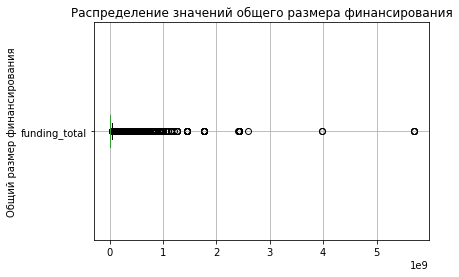

In [41]:
# Строим диаграмму размаха для столбца funding_total
company_and_rounds_new.boxplot(column='funding_total', vert=False)
plt.title('Распределение значений общего размера финансирования')
plt.ylabel('Общий размер финансирования')
plt.show()

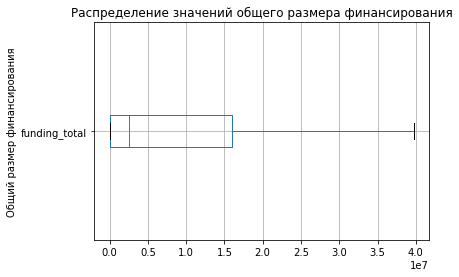

In [42]:
# Строим диаграмму размаха для столбца funding_total без учета выбросов
company_and_rounds_new.boxplot(column='funding_total', vert=False, showfliers=False)
plt.title('Распределение значений общего размера финансирования')
plt.ylabel('Общий размер финансирования')
plt.show()

In [43]:
# Рассмотрим статистические показатели для столбца funding_total
company_and_rounds_new['funding_total'].describe()

count        61666.00
mean      21146234.18
std       90130450.99
min              0.00
25%          60000.00
50%        2490000.00
75%       15948800.00
max     5700000000.00
Name: funding_total, dtype: float64

Типичный размер общего финансирования можно оценить по медиане, в данном случае она равна 2 490 000. Те значения, которые выходят за границы усов графика (1 и 3 квартили - 60 000 и 15 948 800), являются выбросами, то есть выбивающимися


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [44]:
# Объединяем датафреймы company_and_rounds_new и acquisition
df = company_and_rounds_new.merge(acquisition, left_on='company_id_cr', right_on='acquired_company_id', how='left')
df_ifs = df[((df['price_amount'] == 0) 
            |(df['price_amount'] == 1))
            & (df['funding_total']>0)]
display(df_ifs.head(10))

,company_id_cr,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,participants,is_first_round,is_last_round,year,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
38,10054.00,Jumptap,mobile,acquired,2005-01-01,NaN,jumptap.com,jumptap,USA,0.00,...,6.00,0.00,0.00,2008.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
39,10054.00,Jumptap,mobile,acquired,2005-01-01,NaN,jumptap.com,jumptap,USA,0.00,...,2.00,0.00,1.00,2005.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
40,10054.00,Jumptap,mobile,acquired,2005-01-01,NaN,jumptap.com,jumptap,USA,0.00,...,3.00,0.00,0.00,2005.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
41,10054.00,Jumptap,mobile,acquired,2005-01-01,NaN,jumptap.com,jumptap,USA,0.00,...,4.00,0.00,0.00,2006.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
42,10054.00,Jumptap,mobile,acquired,2005-01-01,NaN,jumptap.com,jumptap,USA,0.00,...,6.00,0.00,0.00,2011.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
43,10054.00,Jumptap,mobile,acquired,2005-01-01,NaN,jumptap.com,jumptap,USA,0.00,...,0.00,0.00,0.00,2011.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
44,10054.00,Jumptap,mobile,acquired,2005-01-01,NaN,jumptap.com,jumptap,USA,0.00,...,6.00,1.00,0.00,2012.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
99,101312.00,SideTour,web,acquired,2011-06-01,NaN,sidetour.com,sidetour,USA,0.00,...,3.00,0.00,0.00,2011.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
100,101312.00,SideTour,web,acquired,2011-06-01,NaN,sidetour.com,sidetour,USA,0.00,...,2.00,1.00,0.00,2013.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
101,101312.00,SideTour,web,acquired,2011-06-01,NaN,sidetour.com,sidetour,USA,0.00,...,1.00,0.00,1.00,2011.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18


In [45]:
# Находим 1 и 3 квартили и IQR
q_1 = df_ifs['funding_total'].quantile(0.25)
q_3 = df_ifs['funding_total'].quantile(0.75)
iqr_finding = q_3 - q_1
lower_finding = q_1 - 1.5 * iqr_finding
upper_finding = q_3 + 1.5 * iqr_finding
print(f'Нижняя граница (первый квартиль): {lower_finding}')
print(f'Верхняя граница (третий квартиль): {upper_finding}')

Нижняя граница (первый квартиль): -30133950.0
,Верхняя граница (третий квартиль): 58223250.0


In [46]:
# Находим процентиль, соответствующий верхней границе выбросов
upper = df_ifs['funding_total'][df_ifs['funding_total'] <= upper_finding].count()/len(df_ifs)*100
print(f'Процентиль, соответствующий верхней границе выбросов: {upper:.2f}')

Процентиль, соответствующий верхней границе выбросов: 92.81



### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [47]:
# Группируем данные по категориям по цене и выделяем топ-5 по типично высоким ценам
groupby_median = df.groupby('category_code')['price_amount'].agg(['median', 'std']).reset_index()
groupby_median_sort = groupby_median.sort_values(ascending=False, by='median')
display(groupby_median_sort.head(5))

,category_code,median,std
24,nanotech,584000000.00,NaN
32,real_estate,40000000.00,2129788210.65
19,manufacturing,40000000.00,947980006.15
30,photo_video,40000000.00,339090315.44
2,automotive,21500000.00,2147833365.67


In [48]:
# Группируем данные по категориям по цене и выделяем топ-5 по наибольшему разбросу цен
groupby_std = df.groupby('category_code')['price_amount'].agg(['median', 'std']).reset_index()
groupby_std_sort = groupby_std.sort_values(ascending=False, by='std')
display(groupby_std_sort.head(5))

,category_code,median,std
9,enterprise,0.00,104163452703.60
31,public_relations,0.00,3802535900.24
2,automotive,21500000.00,2147833365.67
32,real_estate,40000000.00,2129788210.65
3,biotech,17600000.00,1336462342.85


Было принято сделать топ-5 компаний по типично высоким ценам и по наибольшему разбросу цен, так как хотелось показать самые высокие значения. Среди категорий с самыми высокими типичными ценами - nanotech, real_estate, manufacturing, photo_video, automotive. А среди тех, где наибольший разброс цен - enterprise, public_relations, automotive, real_estate, biotech. Можно заметить, что оба раза встречаются такие категории, как automotive и real_estate


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [49]:
# Оставим только те компании, у которых количество раундов больше 0
company_and_rounds_new = company_and_rounds_new[company_and_rounds_new['funding_rounds']>0]

In [50]:
groupby_describe = company_and_rounds_new.groupby('status')['funding_rounds'].describe()
display(groupby_describe)

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,4918.00,2.76,1.79,1.00,1.00,2.00,4.00,12.00
closed,2890.00,1.89,1.34,1.00,1.00,1.00,2.00,8.00
ipo,1238.00,4.47,3.18,1.00,2.00,4.00,6.00,13.00
operating,43580.00,2.49,1.87,1.00,1.00,2.00,3.00,15.00


In [51]:
# Группируем данные по статусу по типичному количеству раундов
groupby_car = company_and_rounds_new.groupby('status')['funding_rounds'].median()
display(groupby_car)

status
acquired    2.00
closed      1.00
ipo         4.00
operating   2.00
Name: funding_rounds, dtype: float64

In [52]:
# Группируем данные по статусу по среднему количеству раундов
groupby_mean = company_and_rounds_new.groupby('status')['funding_rounds'].mean()
display(groupby_mean)

status
acquired    2.76
closed      1.89
ipo         4.47
operating   2.49
Name: funding_rounds, dtype: float64

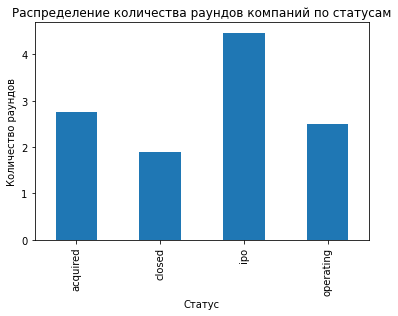

In [53]:
# Визуализируем среднее количество раундов по статусам
groupby_mean.plot(kind='bar', xlabel='Статус', ylabel='Количество раундов', title='Распределение количества раундов компаний по статусам')
plt.show()

Можно заметить, что компаний со статусом ipo меньше остальных (1238), при этом среднее значение количества раундов является наибольшим среди всех категорий (4.47). У этого же статуса типичное значение раундов наибольшее (4), это говорит о том, что именно этот статус компаний привлекает больше раундов финансирования. Но стоит учесть и то, что у ipo стандартное отклонение равняется 3.18, это указывает на, что, возможно, из-за наличия как успехов, так и менее удачных компаний, риски все таки присутствуют.


## Шаг 4. Итоговый вывод и рекомендации



Сначала была осуществлена выгрузка данных, проверка названий столбцов, приведение к стилю snake case. Далее были изменены типы данных в столбцах, содержащих информацию о дате. В большинстве датафреймов обнаружилось значительное количество пропусков, что, несомненно, на мой взгляд, оказало влияние на результаты. 

Предварительное исследование состояло из:
- составления сводной таблицы по годам и сумме финансирования, что позволило сделать вывод о том, что в 2005 году наблюдался максимальный размер собранных средств
- проверки информации о сотрудниках и их образовании, которая показала, что доля сотрудников, у которых присутствует данная информация, составила 0.47 (51 400). Также компании были разделены на 4 категории: ИП, маленькие, средние и большие по количеству сотрудников 
- проверки возможности объединения по столбцу network_username (в результате выяснилось, что лучше не использовать данный столбец для объединения, поскольку количество совпадающих строк равняется 2200 при общем количестве строк более 200 000 в каждом датафрейме)
- разделения датафрейма company_and_rounds на два отдельных датафрейма, которые содержат информацию о компаниях и о раундах. После были удалены дубликаты и пропуски по колонке funding_round_type

Исследовательский анализ начался с фильтрации датафрейма company_and_rounds по количеству раундов (>0) и по статусу компаний (acquired)
Далее была построена диаграмму размаха для столбца funding_total, где было выявлено большое количество выбросов. Также выяснилось, что типичный размер финансирования равен 2 490 000, а значения, превышающие 15 948 800, являются выбивающимися 
После группировки компаний по категориям был выделен топ-5 по типично высоким ценам и по наибольшему размаху цен, и выяснилось, что в обоих топах повторяются категории automotive и real_estate
Исследование столбца funding_rounds по статистическим показателям показало, что компаний со статусом ipo меньше остальных, при этом среднее значение количества раундов является наибольшим среди всех категорий (4.47). У этого же статуса типичное значение раундов наибольшее (4), это говорит о том, что именно этот статус компаний привлекает больше раундов финансирования. Но стоит учесть и то, что у ipo стандартное отклонение равняется 3.30, это указывает на, что, возможно, из-за наличия как успехов, так и менее удачных компаний, риски все таки присутствуют